Final Q-Table Values:
[[-473.23015006 -473.2314597  -473.22887749 -473.2278137 ]
 [-489.19514761 -489.19438378 -489.19301139 -489.19559649]
 [-495.80279808 -495.81442375 -495.8092808  -495.8073217 ]]


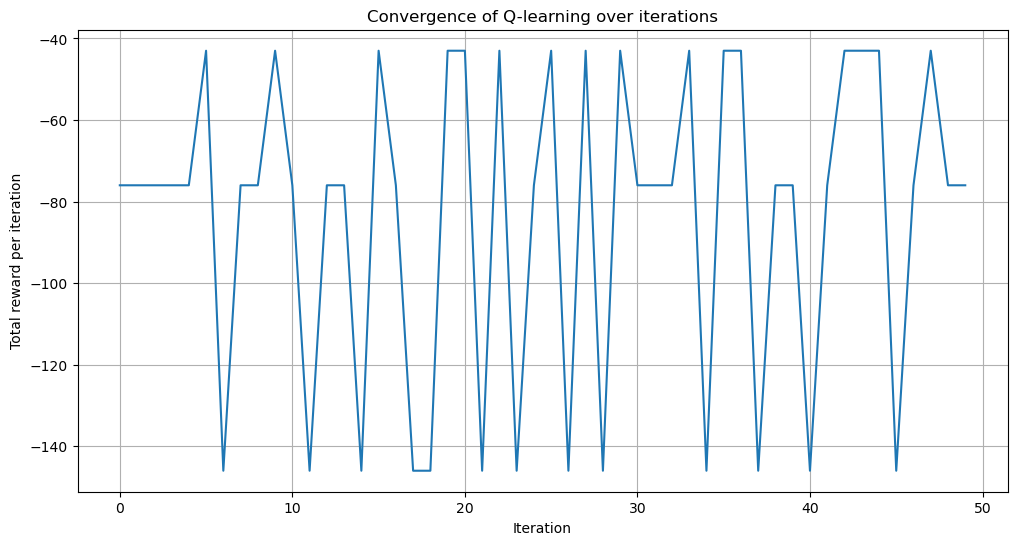

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate for the e-greedy policy
iterations = 5000  # Number of iterations for training
num_states = 3  # Three intersections: A, B, C; Increase for more intersections
num_actions = 4  # Four possible actions: Go straight/backward/left/right

'''
graph = {
    'A': {'B': 2, 'C': 4},  # Intersection A connects to B (weight 2) and C (weight 4)
    'B': {'C': 1},  # Intersection B connects to C (weight 1)
    'C': {}  # Intersection C is a destination
}
'''

#max_vehicles = 3 # max number of vehicles that can move in a single action (3 was picked for the sake of simplicity)
populations = {0: 5, 1: 3, 2: 2}  # population for each state (A=0, B=1, C=2)
weights = [2, 2, 3]  # Weights for each action

# Initialize Q-values arbitrarily for all state-action pairs
Q = np.zeros((num_states, num_actions))
Q_values = []

'''
def update_populations(populations, from_node, to_node, number_of_vehicles):
    populations[from_node] -= number_of_vehicles
    populations[to_node] += number_of_vehicles
'''


# reward function
def reward_function(state, action, next_state, weights, populations):
    sum_weights = np.sum(weights)
    sum_squares_populations_s = np.sum(np.square(populations[state]))
    sum_squares_populations_s_prime = np.sum(np.square(populations[next_state]))
    vehicles_reached_destination = 1 if next_state == 2 else 0
    reward = -1 * (sum_weights ** 2) + sum_squares_populations_s - sum_squares_populations_s_prime + vehicles_reached_destination
    return reward

'''
def reward_function(from_node, to_node, weights, populations, num_vehicles_moved):
    edge_weight = weights[from_node][to_node]
    reward = -1 * (edge_weight ** 2) * (num_vehicles_moved ** 2)  # Squared to increase the penalty for more vehicles
    reward += (populations[from_node] ** 2) - ((populations[from_node] - num_vehicles_moved) ** 2)
    if to_node == 'C':  # C is the destination in this case
        reward += num_vehicles_moved  # More vehicles reaching the destination is better
    return reward
'''

# Choose an action based on the e-greedy policy
def choose_action(state, Q, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(num_actions)  # Explore (random choice)
    else:
        return np.argmax(Q[state, :])  # Exploit (greedy choice)

'''
def choose_action(state, Q, epsilon, populations, graph):
    possible_actions = []
    # Explore (random choice)
    # Generate all possible actions for the current state
    for to_node, weight in graph[state].items():
        for num_vehicles in range(1, min(populations[state], max_vehicles) + 1):
            possible_actions.append((state, to_node, num_vehicles))
    if np.random.uniform(0, 1) < epsilon:
        return random.choice(possible_actions)
    else:
        # Exploit (Greedy choice)
        return max(possible_actions, key=lambda a: Q[state, a])
'''

# Q-learning algorithm
for i in range(iterations):
    state = np.random.choice(num_states)  # Start from a random state
    #state = np.random.choice(list(populations.keys()))  # Start from a random state
    done = False
    sum_rewards = 0

    while not done:
        action = choose_action(state, Q, epsilon)
        #action = choose_action(state, Q, epsilon, populations, graph)
        next_state = (state + 1) % num_states # next state (circular)

        #num_vehicles_moved = action[2]
        #update_populations(populations, state, next_state, num_vehicles_moved)

        #reward = reward_function(state, next_state, weights, populations, num_vehicles_moved)
        reward = reward_function(state, action, next_state, weights, populations)
 

        # Update Q-value
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

        sum_rewards += reward # Summing the rewards in a single iteration
        state = next_state # Transition to next state
        
        # For simplicity, an iteration ends when state C is reached
        if state == 2:
            done=True  # All vehicles have reached the destination  

    Q_values.append(sum_rewards)

# Output the final Q-table
print("Final Q-Table Values:")
print(Q)

new_Q_values = []
for i in range(len(Q_values)):
    if i % 100 == 0:
        new_Q_values.append(Q_values[i])

# Plotting the convergence of rewards over episodes
plt.figure(figsize=(12, 6))
plt.plot(new_Q_values)
plt.title('Convergence of Q-learning over iterations')
plt.xlabel('Iteration')
plt.ylabel('Total reward per iteration')
plt.grid()
plt.show()